In [1]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df= pd.read_csv('sasa_dataframe.csv') # read dataframe from csv file

In [3]:
#remove unamed columns
df.drop(['Unnamed: 0'], axis=1, inplace=True) # axis=1 means drop columns
df.drop(['Unnamed: 0.1'], axis=1, inplace=True) # axis=1 means drop columns
 

In [4]:
df.columns.values # get column names

array(['Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R',
       'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-',
       'B', 'E', 'G', 'H', 'I', 'S', 'T', '2 Oxidation (M)',
       '3 Oxidation (M)', 'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)',
       'Unmodified', 'res_depth', 'ca_depth', 'SASA'], dtype=object)

In [5]:
df.columns[10:].values # get column names from 10 to end

array(['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE',
       'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G', 'H', 'I',
       'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)',
       'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)',
       'Unmodified', 'res_depth', 'ca_depth', 'SASA'], dtype=object)

In [6]:
labels= df['Cleavage']  # get labels

In [7]:
features= df.iloc[:,10:] # get features

<AxesSubplot:>

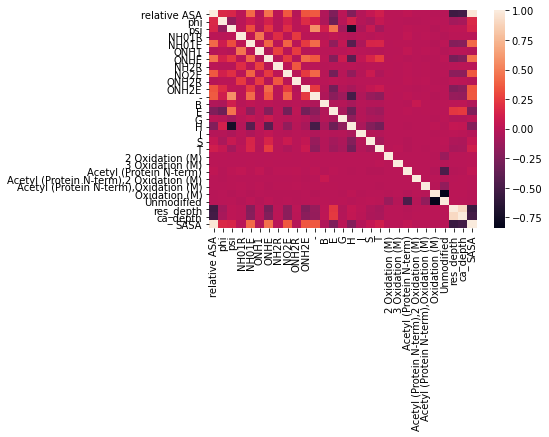

In [8]:
import seaborn as sns # exploratory data analysis
import matplotlib as plt
corr = features.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [9]:
print(features.shape) # get shape of features

(42230, 29)


In [10]:
from sklearn.model_selection import train_test_split # split data into train and test sets
X=features  # features
y=np.ravel(labels)  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # split data into train and test sets

In [11]:
from sklearn.preprocessing import StandardScaler # standardize data
scaler = StandardScaler().fit(X_train) # fit scaler to train data
X_train = scaler.transform(X_train) # standardize train data
X_test = scaler.transform(X_test)   # standardize test data

In [25]:
model = Sequential() # create model   
model.add(Dense(8, activation='relu', input_shape=(29,))) # add layer with 8 neurons and relu activation
model.add(Dense(8, activation='relu')) # add layer with 8 neurons and relu activation
model.add(Dense(1, activation='sigmoid')) # add layer with 1 neuron and sigmoid activation
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile model


In [26]:
model.summary() # print model summary


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 240       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [14]:
len(model.weights) # get number of weights in model

6

In [27]:
model.fit(X_train, y_train,epochs=15, batch_size=1000, verbose=1) # train model

Train on 28294 samples
Epoch 1/15
28294/28294 [==============================] - 1s 22us/sample - loss: 0.5533 - acc: 0.7530
Epoch 2/15
28294/28294 [==============================] - 0s 16us/sample - loss: 0.3614 - acc: 0.8939
Epoch 3/15
28294/28294 [==============================] - 1s 18us/sample - loss: 0.3455 - acc: 0.8944
Epoch 4/15
28294/28294 [==============================] - 0s 17us/sample - loss: 0.3414 - acc: 0.8944
Epoch 5/15
28294/28294 [==============================] - 0s 16us/sample - loss: 0.3391 - acc: 0.8944
Epoch 6/15
28294/28294 [==============================] - 0s 14us/sample - loss: 0.3375 - acc: 0.8944
Epoch 7/15
28294/28294 [==============================] - 0s 16us/sample - loss: 0.3364 - acc: 0.8944
Epoch 8/15
28294/28294 [==============================] - 0s 16us/sample - loss: 0.3355 - acc: 0.8944
Epoch 9/15
28294/28294 [==============================] - 0s 14us/sample - loss: 0.3349 - acc: 0.8944
Epoch 10/15
28294/28294 [==============================] - 

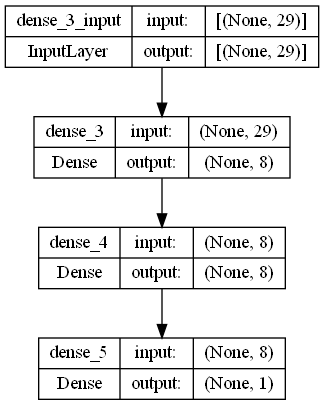

In [28]:
from keras.utils import plot_model 
plot_model(model, to_file='model.png', show_shapes=True) # layer visualization   

In [30]:
y_pred = model.predict(X_test) # predict labels for test data
score = model.evaluate(X_test, y_test,verbose=1) # evaluate model
print(score) 

[0.32601685272839803, 0.8978903]


In [31]:
import shap 

In [32]:
explainer = shap.DeepExplainer(model, X_train) # create explainer
shap_values = explainer.shap_values(X_test) # get shap values for test data

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


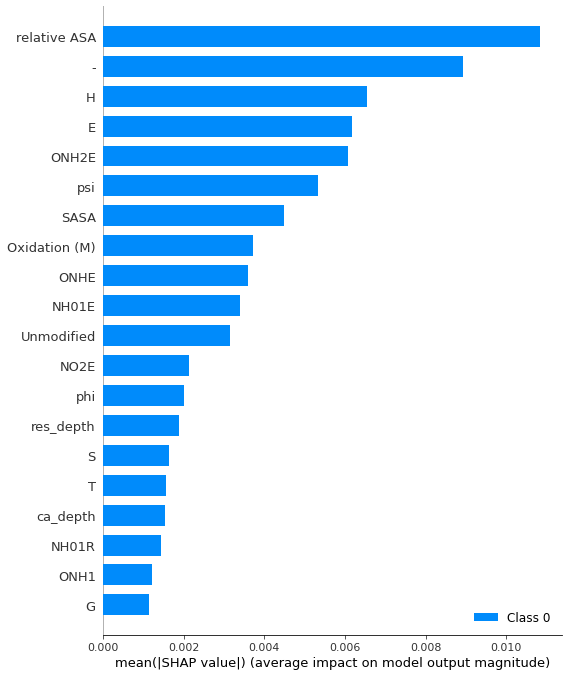

In [34]:
#shap.summary_plot(shap_values[0], plot_type = 'dot', feature_names = features.columns)
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = features.columns) # bar summary plot for shap value


In [35]:
#shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test[0], feature_names = features.columns) # force plot for shap value    

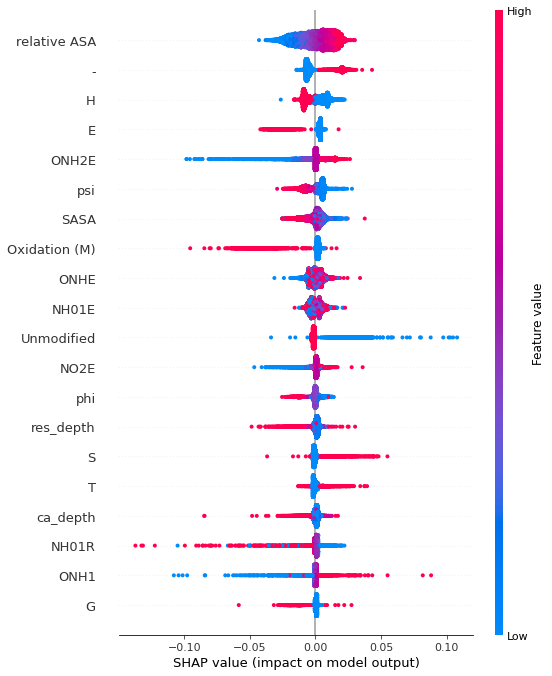

In [36]:
shap.summary_plot(shap_values[0], X_test, feature_names=features.columns, plot_type='dot') # dot summary plot for shap value

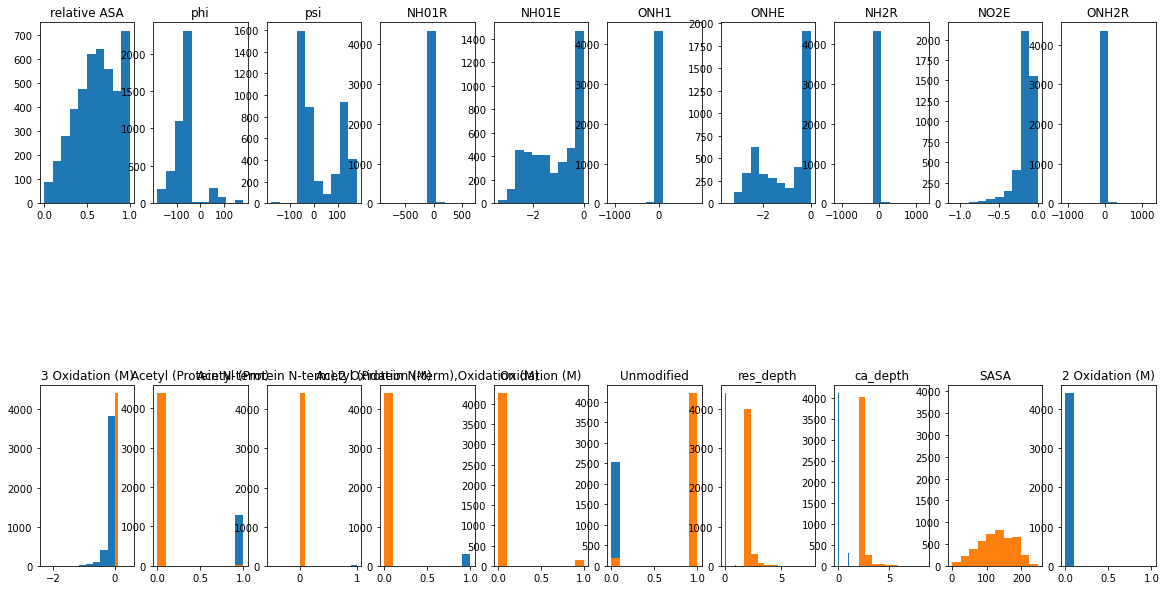

In [37]:
# Values for each feature for missed cleavage samples
df1 = pd.DataFrame(df, columns= np.array(df.columns))  
cleav = df1.loc[(df1.Cleavage == 1)] # get dataframe with cleavage = 1
import matplotlib.pyplot as plt 
fig, ax= plt.fig, ax = plt.subplots(2,10,figsize=(20, 10) )
i = 0
j=0
for c in cleav.columns[10:]:
    ax[j][i].hist(cleav[c])
    ax[j][i].set_title(c)
    i+=1
    if i==10:
        j=1
        i=0
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()



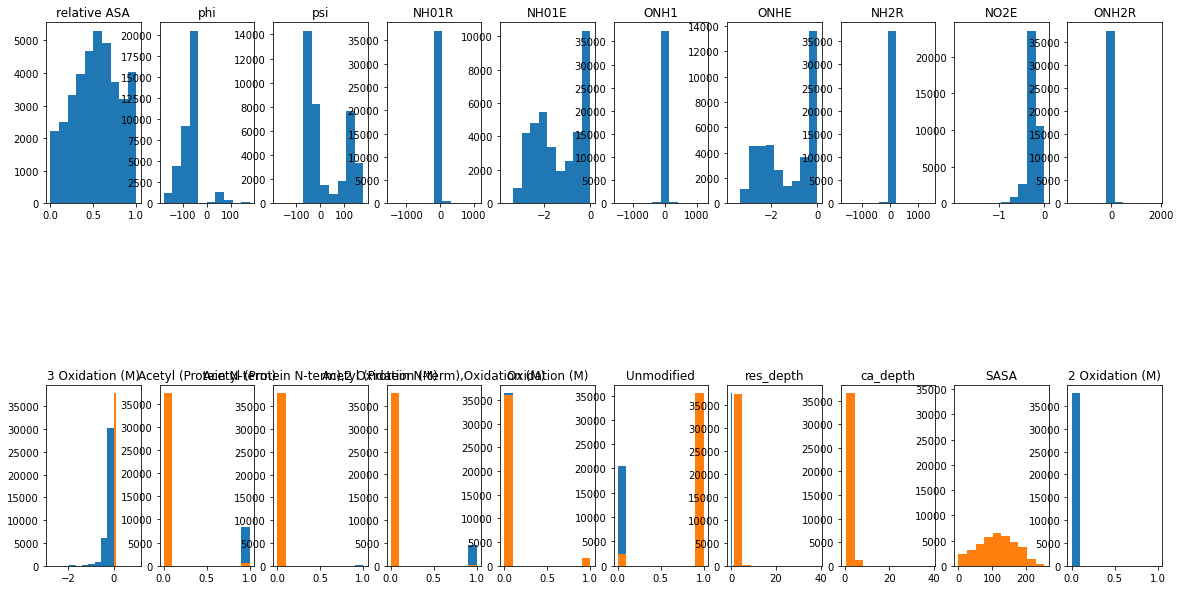

In [38]:
# Values for each feature for correctly cleavage samples
df2 = pd.DataFrame(df, columns= np.array(df.columns))
cleav1 = df2.loc[(df2.Cleavage == 0)]
import matplotlib.pyplot as plt
fig, ax= plt.fig, ax = plt.subplots(2,10,figsize=(20, 10) )
i = 0
j=0
for c in cleav1.columns[10:]:
    ax[j][i].hist(cleav1[c])
    ax[j][i].set_title(c)
    i+=1
    if i==10:
        j=1
        i=0
fig.subplots_adjust(hspace=1, wspace=0.2)
plt.show()
